# Random 3D Data Generator
This code created by Zachary Neronha to generate synthetic 3D data for topological data analysis 

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.cm as cm


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline

from __future__ import division
init_notebook_mode(connected=True)

## 1.1 Generate random points on a sphere
Points will be randomly distributed a certain small distance off the surface of the sphere

In [23]:
r = 1
samplepts = 200
theta = 2*np.pi*np.random.rand(samplepts)
pa = np.random.rand(samplepts)*2-1
phi = np.arccos(pa)

#convert to cartesian points on a circle
x = r*np.cos(theta)*np.sin(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(phi)

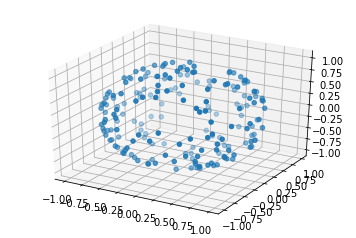

In [24]:
#plot for confirmation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

### Jay plotting code 3D

In [25]:
plt_data = []

trace = go.Scatter3d(
            name = 'SyntheticSphere',
            x = x,
            y = y,
            z = z,
            mode = 'markers',
            marker = dict(
                color = 1,
                size = 8,
                symbol = 'circle',
                line = dict(
                    color = 'rgb(180, 180, 180)',
                    width = 1.0
                ),
                opacity = 0.4
            )
        )

plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    

In [51]:
#Compile data and export data points as csv
savemat1 = np.zeros((samplepts,3))
savemat1[:,0] = x
savemat1[:,1] = y
savemat1[:,2] = z

np.savetxt("Practice3DTDA_Sph.csv", savemat1, delimiter=",")

## 1.3 Multiple Spheres
Generate multiple spheres, and concatenate the data

In [3]:
r1 = 0.2
r2 = 1
r3 = 0.7
samplepts = 100
theta = 2*np.pi*np.random.rand(samplepts)
pa = np.random.rand(samplepts)*2-1
phi = np.arccos(pa)

# first sphere
x1 = r1*np.cos(theta)*np.sin(phi)
y1 = r1*np.sin(theta)*np.sin(phi)
z1 = r1*np.cos(phi)

# now for the second sphere
x2 = r2*np.cos(theta)*np.sin(phi)+1
y2 = r2*np.sin(theta)*np.sin(phi)-2
z2 = .5*r2*np.cos(phi)

# now for the third sphere
x3 = r3*np.cos(theta)*np.sin(phi)-2
y3 = r3*np.sin(theta)*np.sin(phi)-2
z3 = r3*np.cos(phi)-2

In [4]:
#Compile data and export data points as csv
savemat2 = np.zeros((samplepts*3,3))
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
z = np.concatenate((z1,z2,z3),axis=0)
savemat2[:,0] = x
savemat2[:,1] = y
savemat2[:,2] = z
x_all = [x1, x2, x3]
y_all = [y1, y2, y3]
z_all = [z1, z2, z3]

np.savetxt("Practice3DTDA_Sph3.csv", savemat2, delimiter=",")

In [5]:
plt_data = []
for i in range(len(x_all)):  

    trace = go.Scatter3d(
                name = 'SyntheticSphere'+repr(i),
                x = x_all[i],
                y = y_all[i],
                z = z_all[i],
                mode = 'markers',
                marker = dict(
                    color = i,
                    size = 8,
                    symbol = 'circle',
                    line = dict(
                        color = 'rgb(180, 180, 180)',
                        width = 1.0
                    ),
                    opacity = 0.4
                )
            )

    plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    

## 1.2 Generate two concentric spheres and export together

In [27]:
%time
r1 = 0.2
r2 = 1
samplepts1 = 50
theta1 = 2*np.pi*np.random.rand(samplepts1)
pa1 = np.random.rand(samplepts1)*2-1
phi1 = np.arccos(pa1)

#convert to cartesian points on a circle
x1 = r1*np.cos(theta1)*np.sin(phi1)
y1 = r1*np.sin(theta1)*np.sin(phi1)
z1 = r1*np.cos(phi1)

samplepts2 = 300
theta2 = 2*np.pi*np.random.rand(samplepts2)
pa2 = np.random.rand(samplepts2)*2-1
phi2 = np.arccos(pa2)

# now for the second sphere
x2 = r2*np.cos(theta2)*np.sin(phi2)
y2 = r2*np.sin(theta2)*np.sin(phi2)
z2 = r2*np.cos(phi2)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11 µs


In [19]:
#Compile data and export data points as csv
savemat2 = np.zeros((samplepts1+samplepts2,3))
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)
z = np.concatenate((z1,z2),axis=0)
savemat2[:,0] = x
savemat2[:,1] = y
savemat2[:,2] = z

np.savetxt("Practice3DTDA_Sph2.csv", savemat2, delimiter=",")

In [28]:
x_all = [x1,x2]
y_all = [y1,y2]
z_all = [z1,z2]
len(x_all)

2

In [29]:
plt_data = []
for i in range(len(x_all)):  

    trace = go.Scatter3d(
                name = 'SyntheticSphere'+repr(i),
                x = x_all[i],
                y = y_all[i],
                z = z_all[i],
                mode = 'markers',
                marker = dict(
                    color = i,
                    size = 8,
                    symbol = 'circle',
                    line = dict(
                        color = 'rgb(180, 180, 180)',
                        width = 1.0
                    ),
                    opacity = 0.4
                )
            )

    plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    

## 1.3 Generate threeconcentric spheres and export together

In [25]:
%time
r1 = 0.2
r2 = 1
r3 = 3
samplepts1 = 50
theta1 = 2*np.pi*np.random.rand(samplepts1)
pa1 = np.random.rand(samplepts1)*2-1
phi1 = np.arccos(pa1)

#convert to cartesian points on a circle
x1 = r1*np.cos(theta1)*np.sin(phi1)
y1 = r1*np.sin(theta1)*np.sin(phi1)
z1 = r1*np.cos(phi1)

samplepts2 = 300
theta2 = 2*np.pi*np.random.rand(samplepts2)
pa2 = np.random.rand(samplepts2)*2-1
phi2 = np.arccos(pa2)

# now for the second sphere
x2 = r2*np.cos(theta2)*np.sin(phi2)
y2 = r2*np.sin(theta2)*np.sin(phi2)
z2 = r2*np.cos(phi2)

# for the third sphere
samplepts3 = 900
theta3 = 2*np.pi*np.random.rand(samplepts3)
pa3 = np.random.rand(samplepts3)*2-1
phi3 = np.arccos(pa3)

#convert to cartesian points on a circle
x3 = r3*np.cos(theta3)*np.sin(phi3)
y3 = r3*np.sin(theta3)*np.sin(phi3)
z3 = r3*np.cos(phi3)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs


In [26]:
#Compile data and export data points as csv
savemat3 = np.zeros((samplepts1+samplepts2+samplepts3,3))
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
z = np.concatenate((z1,z2,z3),axis=0)
savemat3[:,0] = x
savemat3[:,1] = y
savemat3[:,2] = z

np.savetxt("Practice3DTDA_Sph3.csv", savemat3, delimiter=",")

In [27]:
x_all = [x1,x2,x3]
y_all = [y1,y2,y3]
z_all = [z1,z2,z3]
plt_data = []
for i in range(len(x_all)):  

    trace = go.Scatter3d(
                name = 'SyntheticSphere'+repr(i),
                x = x_all[i],
                y = y_all[i],
                z = z_all[i],
                mode = 'markers',
                marker = dict(
                    color = i,
                    size = 8,
                    symbol = 'circle',
                    line = dict(
                        color = 'rgb(180, 180, 180)',
                        width = 1.0
                    ),
                    opacity = 0.4
                )
            )

    plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    

# 1.3 Torus
Generate random points on a torus according to the equations with random parameters u and v
$$ x = (c + a \cos(v)) \cos(u)$$
$$y = (c + a \cos(v)) \sin(u)$$
$$z = a \sin(v)$$

In [24]:
# Compile random data parameters u and v
sp = 1000
c = 5
a = 2

u = np.random.rand(sp)*2*np.pi
v = np.random.rand(sp)*2*np.pi

# generate x y and z data points
x = (c+a*np.cos(v))*np.cos(u)
y = (c+a*np.cos(v))*np.sin(u)
z = a*np.sin(v)
Torus = np.zeros((len(x),3))
Torus[:,0] = x
Torus[:,1] = y
Torus[:,2] = z

np.savetxt("Practice3DTDA_Torus2.csv", Torus, delimiter=",")


In [23]:
plt_data = []

trace = go.Scatter3d(
            name = 'SyntheticSphere',
            x = x,
            y = y,
            z = z,
            mode = 'markers',
            marker = dict(
                color = 1,
                size = 8,
                symbol = 'circle',
                line = dict(
                    color = 'rgb(180, 180, 180)',
                    width = 1.0
                ),
                opacity = 0.4
            )
        )

plt_data.append(trace)
limparamT = c+a+1
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [-limparamT,limparamT],),
                    yaxis = dict(
                        nticks=4, range = [-limparamT,limparamT],),
                    zaxis = dict(
                        nticks=4, range = [-limparamT,limparamT],),),
                    width=700,
                    margin=dict(
                    r=0, l=0,
                    b=0, t=0)
                  )

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig) 

# 1.3 Torus
Generate random points on a torus according to the following method:
Generate a set of random angles around the initial circle according to: 
$$\theta = U[0,2 \pi]$$
Now generate points on a line in the z direction at those radial points according to
$$L=U[-R,R]$$
Where R is the circular radius of the cross sectional toroid area
Transform those points onto a semi-circle in two dimensions
$$r = \sqrt{R^2-z^2}$$
And for each of those points calculate the ratio of inner radius at that z level to outer radius according to:
$$R_{tune} = \frac{R_{thet}+R_z}{R_{thet}-R_z}$$
because sector area is proportional to the radius. Transform this into a probability that the point should take the inner surface of the torus
$$P_{small} = \frac{1}{1+R_{tune}}$$
Now decouple the second parameter and add in a third random variable according to $R_3 = U[0,1]$. If this takes a value greater than the required probability, place the point on the outer circle by adding the vector to the radial vector determine earlier. Otherwise subtract it placing the point in the inner circle. Z positions are easily assigned from the position along the randomly generated line before transformation 

In [10]:
#first generate a set of radial angles
param = 1000
rBig = 5
rCir = 2

#Make an array for point positions
Torus = np.zeros((param,3))

#generate a list of random starting angles
thetR = np.random.rand(param)*2*np.pi
#starting points
xS = rBig*np.cos(thetR)
yS = rBig*np.sin(thetR)

#now generate a random line of appropriate length
Lran = np.random.rand(param)*(2*rCir)-rCir
Pran = np.random.rand(param)

#compute our relative radii 
Rrel = np.sqrt(rCir**2-Lran**2)

#make sure we go forward and backward with appropriatly tuned probability 
Rtune = (rBig+Rrel)/(rBig-Rrel)
Psmall = 1/(1+Rtune)
IOlog = Pran>Psmall

#Create radial vector at each of our radial pts
Rvec = np.zeros((len(xS),2))
Rvec[:,0] = xS
Rvec[:,1] = yS
Rph = np.arctan(yS/xS)

#create a correction vector
rADJ = np.zeros((param))
rADJ[IOlog==1] = Rrel[IOlog==1]
rADJ[IOlog==0] = -Rrel[IOlog==0]

#now add the two vectors to correct for the torus shape
Rvec[:,0] = Rvec[:,0] + rADJ*np.cos(Rph)
Rvec[:,1] = Rvec[:,1] + rADJ*np.sin(Rph)


Torus[:,0] = Rvec[:,0]
Torus[:,1] = Rvec[:,1]
Torus[:,2] = Lran

np.savetxt("Practice3DTDA_Torus1.csv", Torus, delimiter=",")

In [11]:
plt_data = []
limparamT = rBig+rCir+1
trace = go.Scatter3d(
            name = 'SyntheticTorus',
            x = Torus[:,0],
            y = Torus[:,1],
            z = Torus[:,2],
            mode = 'markers',
            marker = dict(
                color = 1,
                size = 8,
                symbol = 'circle',
                line = dict(
                    color = 'rgb(180, 180, 180)',
                    width = 1.0
                ),
                opacity = 0.4
            )
        )

plt_data.append(trace)
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [-limparamT,limparamT],),
                    yaxis = dict(
                        nticks=4, range = [-limparamT,limparamT],),
                    zaxis = dict(
                        nticks=4, range = [-limparamT,limparamT],),),
                    width=700,
                    margin=dict(
                    r=0, l=0,
                    b=0, t=0)
                  )



fig = go.Figure(data=plt_data, layout=layout)

iplot(fig) 

# 2.0 Generate Moving Points in a Circle

In [80]:
#define tunable parameters
pts = 5;
totalframe = 20
movenoise = 3
radialnoise = 1.2

#generate radial noise
rNOS = np.random.normal(3,radialnoise,totalframe*pts)

#generate the thetamove matrix
thetMOV = np.random.normal(np.pi/6,(np.pi/6)*movenoise,totalframe*pts)
thetCUR = np.zeros((pts))

Positions = np.zeros((pts*totalframe,3))


for i in range(0,totalframe):
    for j in range(0,pts):
        SpRad = rNOS[i*pts+j]
        Positions[i*pts+j,:] = [i,SpRad*np.cos(thetCUR[j]+thetMOV[i*pts+j]),SpRad*np.sin(thetCUR[j]+thetMOV[i*pts+j])]
        thetCUR[j] = thetCUR[j]+thetMOV[i*pts+j]
        
np.savetxt("Dynamic2DNoise1.2.csv", Positions, delimiter=",")
        

In [81]:
plt_data = []
trace = go.Scatter(
            name = 'SyntheticSphere',
            x = Positions[:,1],
            y = Positions[:,2],
            mode = 'markers',
            marker = dict(
                color = 1,
                size = 8,
                symbol = 'circle',
                line = dict(
                    color = 'rgb(180, 180, 180)',
                    width = 1.0
                ),
                opacity = 0.4
            )
        )

plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    